# Assignment 1

### Imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import folium

### Retrieval of data

In [3]:
# Start by reading the data from the CSV file
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Preperation

<font color = "#000794"> To ease later use of date manipulation, all dates within the dataframe are converted to Datetime objects.

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

<font color = "#000794"> **NB!** If the two maps in **Part 4: A bit of geo-data** aren't visible then go to `File -> Trust Notebook` and they should appear.

## Part 1: Temporal patterns

We look only at the focus-crimes in the exercise below.

In [2]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

* *Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).  

* In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

<font color = "#000794"> Despite forgetting about the yearly variation, it is still important to exclude partial data from the incomplete year of 2018. Otherwise, some months will occur more than others, resulting in a slighlty higher occurence count. This could also be adjusted for by standarlizing the occurences.

A copy of the original dataframe is created where all rows adhere to the specified conditions:

In [24]:
dataFullYears = data.loc[data['Date'] < "20180101"]
dataFocus = dataFullYears[dataFullYears["Category"].isin(focuscrimes)]

<font color = "#000794"> A general function to output subplots for weekly patterns, months and 24-hour cycles is defined below, as these categories share the same characteristics.

* Instead of using nested for-loops, the row and column positioning is determined based on integer division and modulo remainder.

* X-labels are only visible on the bottom row, to keep it more compact and easy on the eyes. Gridlines do remain however. </font>

In [17]:
figWidth = 12
figHeight = 18
nRow = 7
nCol = 2

def plotData(dataList):
    fig, axes = plt.subplots(nRow, nCol, figsize = (figWidth, figHeight))
    for i in range(0,nRow*nCol):
        r = i//nCol
        c = i%nCol
        dataList[i][1].plot(kind = 'bar', subplots = True, ax = axes[r,c])
        axes[r,c].set_title(dataList[i][0])
        axes[r,c].yaxis.set_label_text("Crime count")
        # Only show x-tick labels on bottom plots
        if not r == nRow-1:
            axes[r,c].xaxis.set_ticklabels([])
            axes[r,c].xaxis.set_label_text("")
    plt.show()

### Weekly patterns

* Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

<font color = "#000794"> To order the data by weekly pattern (weekdays), the dataframe is grouped according to the column **DayOfWeek**. For each weekday, the total count of occruences is measured. Each focuscrime is saved as an independant indency in the list **crimeDaily**.

In [19]:
daysOrdered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimeDaily = []
for c in focuscrimes:
    crimeData = dataFocus[dataFocus["Category"] == c].groupby(dataFocus['DayOfWeek']).size()
    crimeDaily.append((c,crimeData[daysOrdered]))

<font color = "#000794"> Using the created function **plotData**, the grouped data is plotted in subplots:

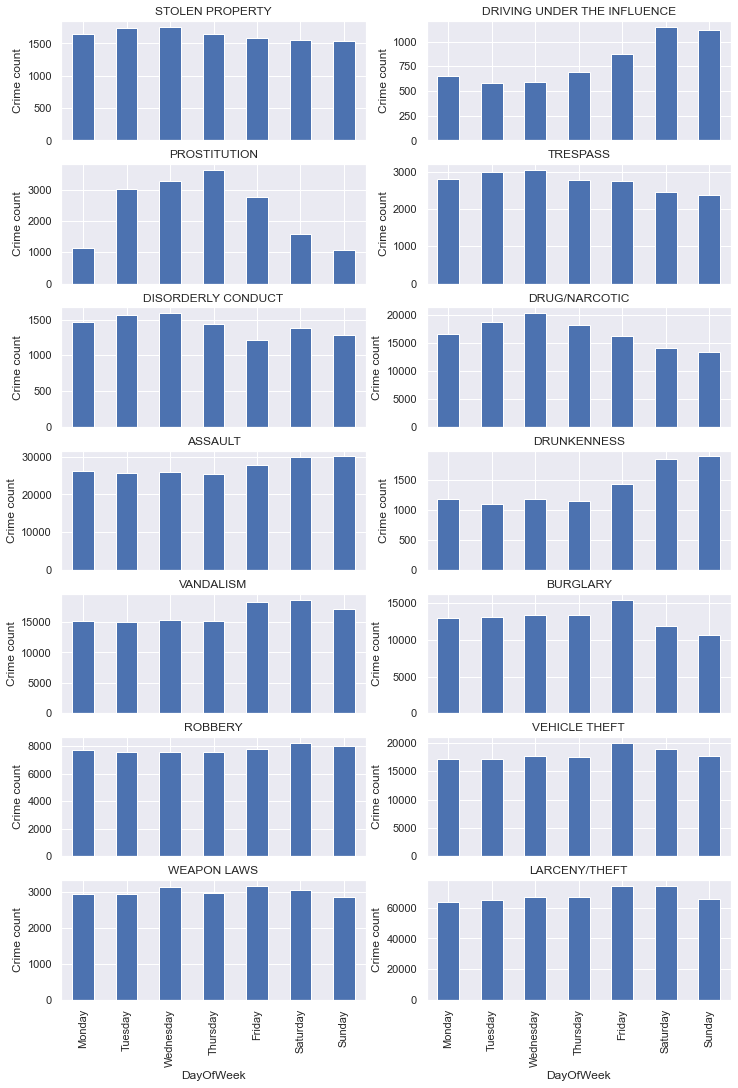

In [18]:
plotData(crimeDaily)

<font color = "#000794">It is natural to assume that some crimes occur more often in weekends (Saturday-Sunday) than on working weekdays (Monday-Friday). For "Drunkenness", Friday has the highest working weekday count, but Saturday and Sunday are significantly higher too. This is expected, and it is only natural, that "Driving under the influence" follows the same tendency; the more people drink, the more people drive under the influence.

"Vandalism" and "Burglary" also have higher counts during the weekends. The former one could be influenced by higher consumption of alcohol too, as this is often associated with alcohol intake as well. Same applies to "Disorderly conduct" though, which peaks during working days. Hence, just like with "Burglary", people probably have more sparetime to perform the specified crimes, given most people do not work on the weekend. 

At first glance it is surprising that prostitution does not top in weekends too, but around the middle of the week. It is however known that many people who use these services prefer to do so before/after work when they're already away from home, instead of in the weekends where they tend to spend time with their family and live "happily ever after". Of cource, people who hide it from their families are not the only ones using such services, but it could be part of the explanation. Maybe it's for many what gets them through the week?</font>

### Monthly patterns
* We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

<font color = "#000794"> To order the data by a monhtly pattern, the dataframe is grouped according to the column **Date** with months as frequency. To concatenate data from different years, the months are afterwards formatted and summed together. This could have been done "on the fly" when grouping, but doing it sequentially improves computation time.

Finally, the total count of occurences is measured for each month. Each focuscrime is saved as an independent indency in the list **crimeMonthly**.

Like before, the grouped data is plotted in respect to each category of crime. </font>

In [25]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
crimeMonthly = []
for c in focuscrimes:
    crimeData = dataFocus[dataFocus["Category"] == c].groupby(pd.Grouper(key = 'Date', freq = 'M')).size()
    # Format as months and group years with sum:
    crimeData.index = crimeData.index.strftime('%B')
    crimeData = crimeData.groupby(level = 0).sum()
    crimeMonthly.append((c,crimeData[months]))

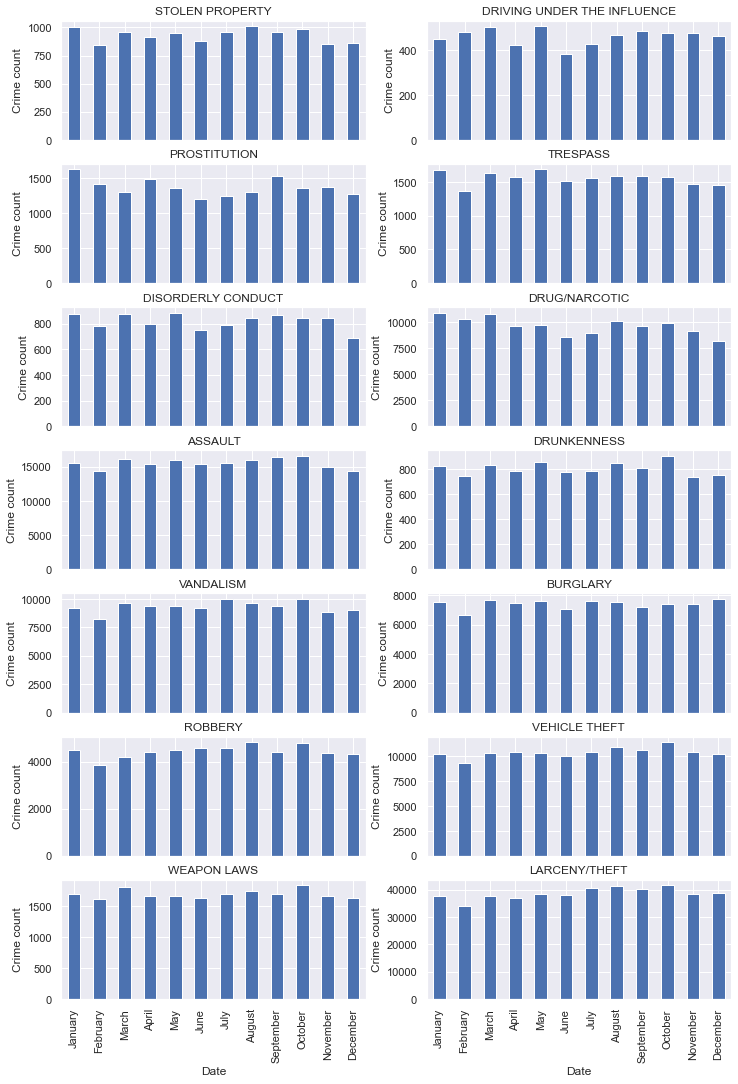

In [26]:
plotData(crimeMonthly)

<font color = "#000794">On a monthly basis, the graphs are more smoothed out than on weekdays - however, there are still some interesting catch points.

"Drunkenness" and "Driving under the influence" again follow the same tendency, and as with "Drug/Narcotic", the values drop around summer time. People tend to be happier around this time a year, which might explain why there is, for many, slightly less use of such substances. Same could apply to prostitution. Compared to November and December, the use of drugs also rises significantly in January. New Years Eve tends to be one of the nights a year where people intake the highest amount of substances, where many are probably not registered until after midnight. This could be one reason for it.

"Larceny/Theft" is pretty high around July/summer and until January. Surprisingly, it drops a bit in November/December, where many are probably in need of Christmas presents. Late summer and winter are usually right within sale seasons, where the highest amount of people go to shop. As someone who has been working in such businesses, theft was always significantly higher during these periods, as there was simply less control due to higher pressure.</font>

### 24 hour cycle
* We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

<font color = "#000794"> To investigate crime on an hourly basis, an additional column **Hour** is added to the dataframe, containing the hourly count from the existing column **Time**.

In [30]:
hourRow = lambda row: row['Time'][:2]
hourCol = dataFocus.apply(hourRow, axis = 1)
dataFocus = dataFocus.assign(Hour = hourCol.values)

<font color = "#000794"> To order the data by an hourly cycle, the dataframe is grouped according to the newly created column **Hour**. Again, the total count of occurrences are measured for each group/hour. Each focuscrime is saved as an independent indency in the list crimeHourly.

Once again, the grouped data is plotted in respect to each category of crime. </font>

In [32]:
crimeHourly = []
for c in focuscrimes:
    crimeData = dataFocus[dataFocus["Category"] == c].groupby(dataFocus['Hour']).size()
    crimeHourly.append((c,crimeData))

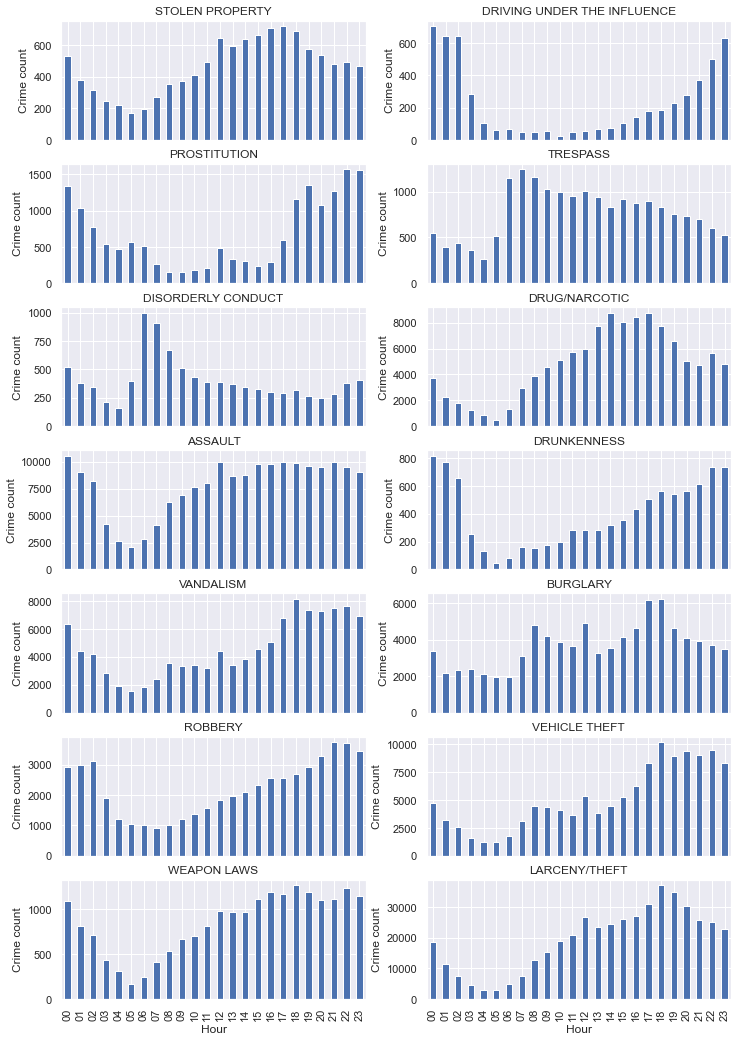

In [33]:
plotData(crimeHourly)

<font color = "#000794">When investigating the hourly crime count, the numbers naturally, generally, drop at night as most people are asleep. It is interesting however that "Disorderly conduct" is so high so early in the morning - usually hours after a regular night out.

"Drunkenness", "Driving under the influence" and "Robbery" all top around 11 pm to 3 am. It makes sense that robbers prefer to act at night, as other people are alseep at this time. Narcotics are at its highest amount in the mornings, but many addicts probably need their fix first thing when they wake up.

"Prositution" is at its highest around nights as well, which does conflict with the idea presented before regarding workers using the services to/from work. Then the cause for the users is perhaps just to get them through the week. It could also be that prostitues prefer to work more in the middle of the week, and perhaps spend time with their family/kids in weekends? It is definitely interesting.</font>

### Hours of the week
* But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

<font color = "#000794"> To group the data based on the hour of the week accumulating from monday to sunday, yet another column named **HourWeek** is added to the dataframe. The values within this column are calculated based on the total amount of hours since the beginning of the week using **DayOfWeek** and **Hour** in combination.

In [35]:
def getHourWeek(row):
    return daysOrdered.index(row['DayOfWeek'])*24 + int(row['Hour'])

hourWeekRow = lambda row: getHourWeek(row)
hourWeekRowCol = dataFocus.apply(hourWeekRow, axis = 1)
dataFocus = dataFocus.assign(HourWeek = hourWeekRowCol.values)

<font color = "#000794"> To order the data by hours of the week, the dataframe is grouped according to the newly created column HourWeek. Yet again, the total count of occurrences is measured for each group/hour. Each focuscrime is saved as an independent indency in the list crimeDayWeekly.

In [36]:
crimeDayWeekly = []
for c in focuscrimes:
    crimeData = dataFocus[dataFocus["Category"] == c].groupby(dataFocus['HourWeek']).size()
    crimeDayWeekly.append((c,crimeData))

<font color = "#000794"> To optimize the output of the plots slightly, the x-ticks are this time around set to increase at exactly the value 12 (to better understand day/night relation). The plot type is also changed to a line plot, as lines are slightly easier to read than bars given this much information.

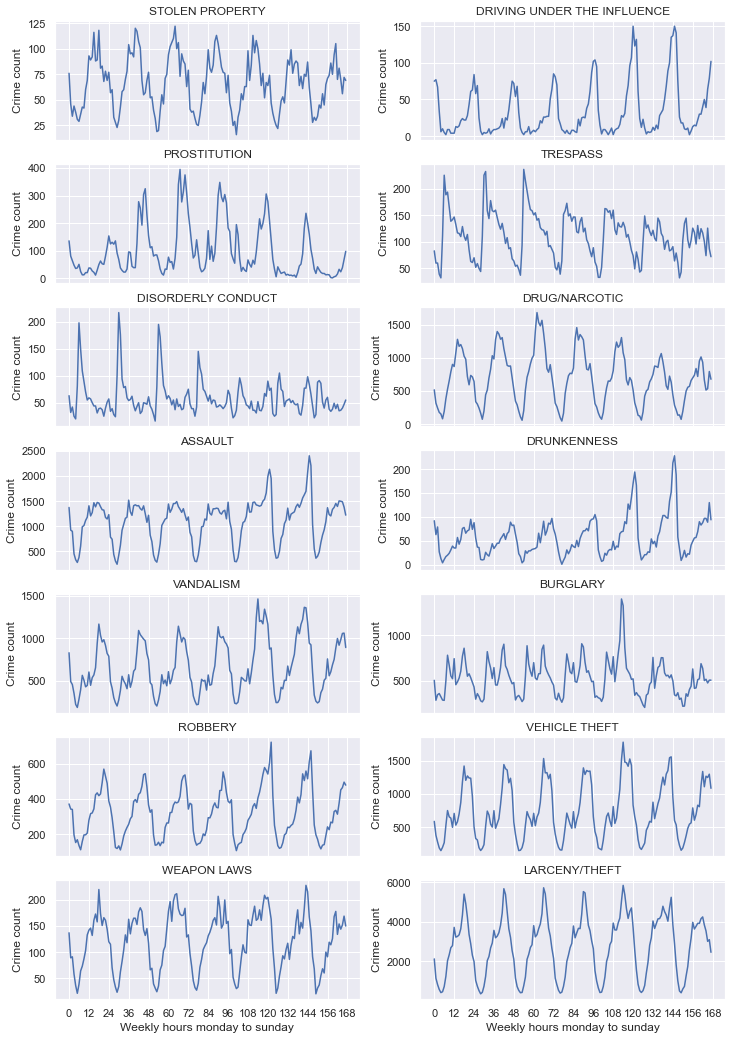

In [59]:
xTicks = np.arange(0, 170, 12)
fig, axes = plt.subplots(nRow, nCol, figsize = (figWidth,figHeight))
for i in range(0,nRow*nCol):
    r = i//nCol
    c = i%nCol
    axes[r,c].plot(crimeDayWeekly[i][1])
    axes[r,c].set_title(crimeDayWeekly[i][0])
    axes[r,c].xaxis.set_ticks(xTicks)
    axes[r,c].yaxis.set_label_text("Crime count")
    # Only show x-tick labels on bottom row
    if not r == nRow -1:
        axes[r,c].xaxis.set_ticklabels([])
        axes[r,c].xaxis.set_label_text("")
    else:
        axes[r,c].xaxis.set_label_text("Weekly hours monday to sunday")
plt.show()

<font color = "#000794">On an hourly basis througout the whole week that combines the weekdays with hourly counts, much of what is already derived pops out: "Drunkenness", "Driving under the influence", "Vandalism", "Assault" and "Robbery" all peak at Friday and Saturday nights.

"Disorderly conduct" and "Trespassing" is very high in the first few weekdays, where the former one tends to be at it highest around mid-day, and the latter earlier in the morning (late at night).</font>

## Part 2: Thinking about data and visualization

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

<font color = "#000794"> The Pearson correlation (eq. 1) [[1]](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a measure of linear correlation between two datasets.

To understand this linear correlation, it is necesarry to also understand covariance (eq. 2) [[2]](https://en.wikipedia.org/wiki/Covariance). Covariance is a measure of directional relationship between two sets of variables. If two datasets, for instance, follow the same tendency, meaning that positive numbers in dataset A relate to positive numbers in dataset B, and negative numbers in dataset A relate to negative numbers in dataset B, the covariance between these two datasets will be positive. If, however, positive values in one of the datasets relate to negative numbers in the other and vica versa, the covariance will be negative. If there is no relation whatsoever between two datasets, the covariance will result to 0.</font>

<font color = "#000794">It is, however, difficult to interpret the magnitude of covariance (as this is greatly impacted by the variable's original magnitude), which is where the Pearson correlation comes in handy. The Pearson correlation is calculated by dividing the covariance of two sets of variables, with the product of their respective standard deviations. In other words, it is a standardized measurement of the covariance with a normalized magnitude.

A Pearson correlation coeeficient is always between -1 and +1 inclusive, with $p_{X},_{Y}=-1$ indicating a perfect negative correlation and $p_{X},_{Y}=+1$  indicating a perfect positive correlation. $p_{X},_{Y}=0$  implies that there is no correlation betwee the two datasets. In real world examples, $p_{X},_{Y}$ usually lies somewhere in between.</font>

<font color = "#000794">

$$p_{X},_{Y} = \frac{\textrm{cov}(X,Y)}{\sigma_{X}\sigma_{Y}}, \qquad \textrm{where} \qquad p \in [-1,1] \qquad \textrm{and} \qquad(eq. 1)$$

$$ \textrm{cov}(X,Y) = \mathbb{E}[(X-\mu_{X})(Y-\mu_{Y})] = \mathbb{E}[XY]-\mathbb{E}[X]\mathbb{E}[Y] \qquad(eq. 2)$$

In the Pearson (eq. 1) and covariance (eq. 2) equations, $\sigma$ stands for the standard deviation, $\mu$ stands for the mean and $\mathbb{E}$ stands for the expectation (expected value).
   
<font color = "#000794"> Now, are there any instances where the Pearson correlation fails to tell us the "truth" but visualization can? As it turns out, the answer is yes. A simple example is when data has a lot of outliers, or a few big ones. Outliers can have a great effect on standard deviation and therefore the Pearson correlation. Another one is data that is correlated, but not linearly. The Pearson correlation might indicate that there is no correlation between two datasets but when they are plotted against one another, an obvious non-linear relationship between them might be revealed. Then we can also have data that looks like two subgroups when plotted. Such an instance could have a perfectly correlated Pearson coefficient even though there is obviously no linear relationship - it was just calculated that way between two clusters [[3]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/).
    
So, lesson learned: Always plot your data!
</font>

* What is the difference between a bar-chart and a histogram?

<font color = "#000794"> While bar-charts and histograms might look similar, they are fundementally very different.

Bar-charts plot categorial data and compare magnitudes in between those categories. The majority of the visualizations in **Part 1: Temporal Patterns** are illustrated using bar-charts. These visualizations are a perfect example of how data can be manipulated using different categories (weekly, monthly and hourly patterns). The magnitude of a category greatly depends on how you categorize (naturally). In these plots, the magnitudes of the bars are equal to the specified category's occurence crime count; however, any potential similarity measure could have applied - possibly resulting in a very different outcome.

Histograms, on the other hand, plots distributions of quantitative data grouped into certain intervals (also referred to as bins). Let's say that you have a dataset of values between 1 and 100 and want to visualize it. Instead of plotting frequency counts of all 100 variables, it would probably make more sense to divide the dataset into specified ranges of let's say 10. If you do this, you would have a histogram of 10 bins with frequency counts corresponding to all numbers that fall within the given tens.
This histogram could also be normalized to show relative frequencies (proportions of the entire dataset that falls within each bin). Then the sum of all heights would equal to 1. </font>

* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

<font color = "#000794"> In order to show important details and the overall distribution of the data being histogrammed, as well as limiting the amount of noise in the graph, it is crucial to chose an appropriate bin-size. Firstly, it's important to include all data points in the graph and therefore the bins should include all outliers. Secondly, to simplify the interpretation of the graph, bins should all be of the same size (except in some specific cases with other kind of interpretation) and should begin and end at whole numbers, optimally. For smaller datasets, choosing bins can be fairly easy and a few trial runs can do the trick. However, there are multiple algorithms that can be used to determine the bin-size of a histogram and a popular one that seems to work well is called the [Freedman–Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule). Let's look at that one.
    
This rule is designed to minimize the difference in the areas under the empirical and theoretical probability distributions of the data in question. The equation for bin-width is:</font>

<font color = "#000794">
    
$$
h = 2\frac{IQR(x)}{\sqrt[3]{n}}
$$
    
Where where $IQR(x)$ is the interquartile range of the data $x$ and $n$ is the number of observations. An interquartile range is simply the difference between the first and third quantiles of a dataset, i.e. $IQR(x) = Q_3(x)-Q_1(x)$, which can be easily calculated. 
    
Then, to find the number of bins, we can calculate:
    
$$
k = \frac{\max(x)-\min(x)}{h}
$$
    
This rule, as others with the same purpose, can be used to calculate bin-sizes when it's too difficult to just eyeball it based on the data.
</font>

## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

<font color = "#000794"> For this plot, we choose to look at "Assault" crimes over a 6 month period, the second half of 2016. We then choose to look at the hour between 22 and 23. </font>

In [6]:
# Gathering the data with our constraints
assaulthour = pd.DataFrame(columns = ["Time"])
months = [6, 7, 8, 9, 10, 11]
assaulthour["Time"] = data.loc[(data["Category"] == "ASSAULT") & 
                             (data["Date"].dt.year == 2016) & 
                             (data["Date"].dt.month.isin(months)) &
                             (pd.to_datetime(data["Time"]).dt.hour == 22), "Time"].sort_values()

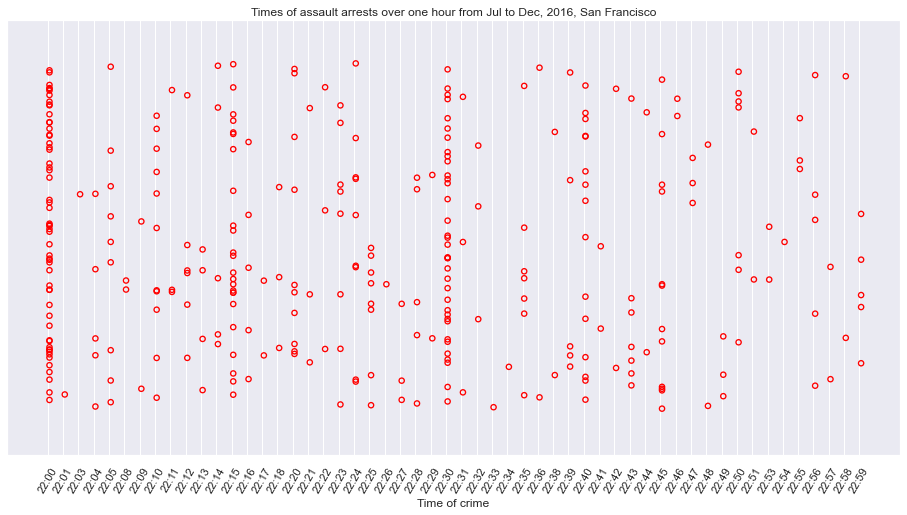

In [5]:
# Plotting the jitter plot
plt.figure(figsize = (16,8))
plt.title("Times of assault arrests over one hour from Jul to Dec, 2016, San Francisco")
sns.stripplot(x = assaulthour["Time"], jitter = 0.4, marker = "$\circ$", size = 10, color = "red")
plt.xticks(assaulthour["Time"].unique(), rotation = 60)
plt.xlabel("Time of crime");

<font color = "#000794">On the jitter plot above, we have chosen to look at assault crimes over a 6 month period, July to December of 2016. We also chose to look at the hour between 22 and 23 o'clock, since we can see from **Part 1: Temporal patterns** that these crimes tend to be a little more frequent in the later hours of the day. The point of the jitter plot is to be able to see all observations we have for each timestamp. If we would not spread out the points along the y-axis, i.e. make them jitter, we wouldn't be able to tell how many arrests are logged at each timestamp

Now, as was suspected, it seems that the police doesn't always jot down the **exact** time of when arrests happen. This can be concluded from investigating the plot, where it is clear that most of the timestamps are logged at 22:00 and 22:30. There also seem to be a few extra logs at 22:15 compared to other minutes of the hour. Since we have so many points at these two, three timestamps, and they are not spread out more evenly over the whole hour, it can be concluded that the police often rounds up or down the time of arrest. We can also assume the case is the same for other crime types.</font>

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram).
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

<font color = "#000794"> For the following exercise we'll choose "Vehicle theft" and "Missing person", with data for the whole year of 2017.

In [7]:
# Gathering the data with our constraints
crimes2 = ["VEHICLE THEFT", "MISSING PERSON"]
crimes2_df = data[(data["Category"].isin(crimes2)) & (data["Date"].dt.year == 2017)].sort_values(by = "Date")

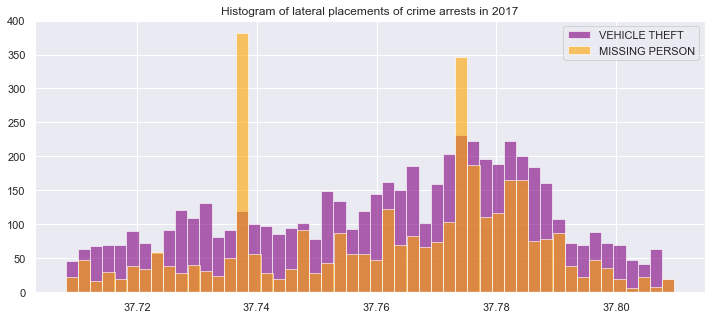

In [18]:
# Making 50 bins of the crime arrest latitudes for each crime
bin_no = 50
bins_car = np.histogram(crimes2_df[crimes2_df["Category"] == crimes2[0]]["Y"], bins = bin_no)[1]
bins_miss = np.histogram(crimes2_df[crimes2_df["Category"] == crimes2[1]]["Y"], bins = bin_no)[1]

# And then plotting a histogram with both crimes, each a different color
plt.figure(figsize = (12,5))
plt.title("Histogram of lateral placements of crime arrests in 2017")
plt.hist(crimes2_df[crimes2_df["Category"] == crimes2[0]]["Y"], bins = bins_car, color = "purple", alpha = 0.6)
plt.hist(crimes2_df[crimes2_df["Category"] == crimes2[1]]["Y"], bins = bins_miss, color = "orange", alpha = 0.6)
plt.legend(labels = [crimes2[0], crimes2[1]]);

<font color = "#000794"> Based on the histogram above, we can see that San Fransisco's latitude spans from around 37.70 to 37.81 degrees. We have plotted two crimes, "Vehicle theft" in purple and "Missing person" in orange, both with data from 2017. Based on a few trial runs, a bin size of 50 bins seemed to fit the data well. 

When investigating the histogram, we can see that both of the crimes have a high point at around 37.774 degrees latitude, which seems to be right down town where there is a lot going on. More importantly, many of the police departments also seem to be located around that degree, when looking at Google Maps. As we'll see later, crimes are sometimes registered at the police station rather than at the exact scene of the crime. That high point on the histogram has the bin with the most logs for "Vehicle theft" and generally, both the histograms seem a little left skewed. However, the logs for "Missing person" cases skyrocket and are the most frequent at around 37.738 degrees. Apart from that bin, both crimes seem to have a similar distribution.

So why is there one bin towering over all the others? When looking at Google Maps again, we can see that there are a few police departments at around 37.730 degrees, so a little lower down than the bin suggests and therefore maybe not the reason for this high count. Another speculation is that there may be some bad/dangerous neighborhoods or places around this degree and therefore many "Missing person" cases logged there. To obtain a definite answer for the reason of this high bin, further investigation would be needed.</font>

## Part 4: A bit of geo-data

*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start = 13)`, where you'll have to look up San Francisco's longitude and latitude.
* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

<font color = "#000794"> The following graph utilizes Folium to plot a map of San Francisco. The Folium package allows the user to easily add a marker to the graph. Here, this is shown by adding a marker at the City Hall. If the marker is clicked, a pop-up will appear indicating what the marker is marking. </font>

In [25]:
sf_lat = 37.773972
sf_lon = -122.431297
zoom = 13
sf_map = folium.Map([sf_lat, sf_lon], zoom_start = zoom)

# Add a marker for city hall
cityHall_lat = 37.77919
cityHall_lon = -122.41914
folium.Marker([cityHall_lat, cityHall_lon], 
              popup = 'City Hall',
              icon = folium.Icon(color = 'blue', icon = 'info', prefix = 'fa') 
             ).add_to(sf_map)

# Show the map
sf_map

* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 
We can call this a kind of visualization a *point scatter plot*.

<font color = "#000794"> The code below plots up the same map and uses the database of incident reports in San Francisco to add a marker at the location of each incedent. For simplicity and readability, only crimes under the category "Drug/narcotic" were plotted for the months of June and July of 2016.

In [30]:
year = 2016
month_offset = 1
month_start = 6 + month_offset
month_end = 7 + month_offset

# Draw a little dot for each drug/narcotic arrest
map_drugs = folium.Map([sf_lat, sf_lon], zoom_start=zoom)

crime_type = 'DRUG/NARCOTIC'
crimes = data[(data['Category'] == crime_type) & \
              (data['Date'].dt.year == year) & \
              ((data['Date'].dt.month == month_start) | (data['Date'] == month_end))]

feature_group = folium.FeatureGroup("Locations")
lat = crimes['Y'] 
lon = crimes['X']
for X,Y in zip(lat, lon):
    feature_group.add_child(folium.Marker(location = [X,Y]))

map_drugs.add_child(feature_group)
map_drugs

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.
>
> The exercise is simply this:
> * For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

<font color = "#000794"> The dataset used in this assignment shows multiple examples of how data can contain errors that lead to an imprecise or incorrect analysis. If the dataset is used blindly, without looking at the details of the data and looking for irregularities, any conclusion made from the data may be misleading. Whilst inspecting the dataset of incidents in San Francisco, a few errors were noticed that will be considered in detail below.
    
The hourly activity of reported prostitution incidents reaches a very suprising high peak on Wednesdays. Moreover, there generally seem to be reported more prostitution incidents on weekdays than weekends. This seems very suspicious and if not questioned the drawn conclusion would be that prostitution is less common on weekends. However, the explanation could, for example, simply be because the San Francisco police raided the streets known for prositution more regularily on weekdays than on weekends when their time might have been more occupied by other incidents such as drunkenness.</font> 

<font color = "#000794"> Secondly, the data depicts that very many sex offences occur at the Hall of Justice in San Francisco. This is highly unlikely and suggest that these crimes were registered to the location of were the incident was reported rather than where it happened. This causes a severe inaccuracy if the raw data is used to estimate a likely hotspot for sex offences.

Another error in the dataset is the inaccurate timestamps of the incidents. A possible explanation of this is that the reports were made a while after the incident happened and the police officers couldn't recall the exact time of the incident. Therefore, the timestamp is approximated.
When the data is plotted according to the timestamp of the incidents, the observations that are on the hour or at 10-15 min increments from the hour will be significantly more saturated than the time in between. This will effect the average and lessen it's credability as well as make the analysis wrongfully favour certain time slots.

Furthermore, the timestamps on incidents that happen discretely and are only reported when the crime has been noticed may also be very inaccurate. For example crimes like vehicle theft, stolen property and vandalism are very likely to be discovered some time after the crime happened. The police reports will therefore indicate a misleading timestamp since the accurate timestamp may be unknown. </font>